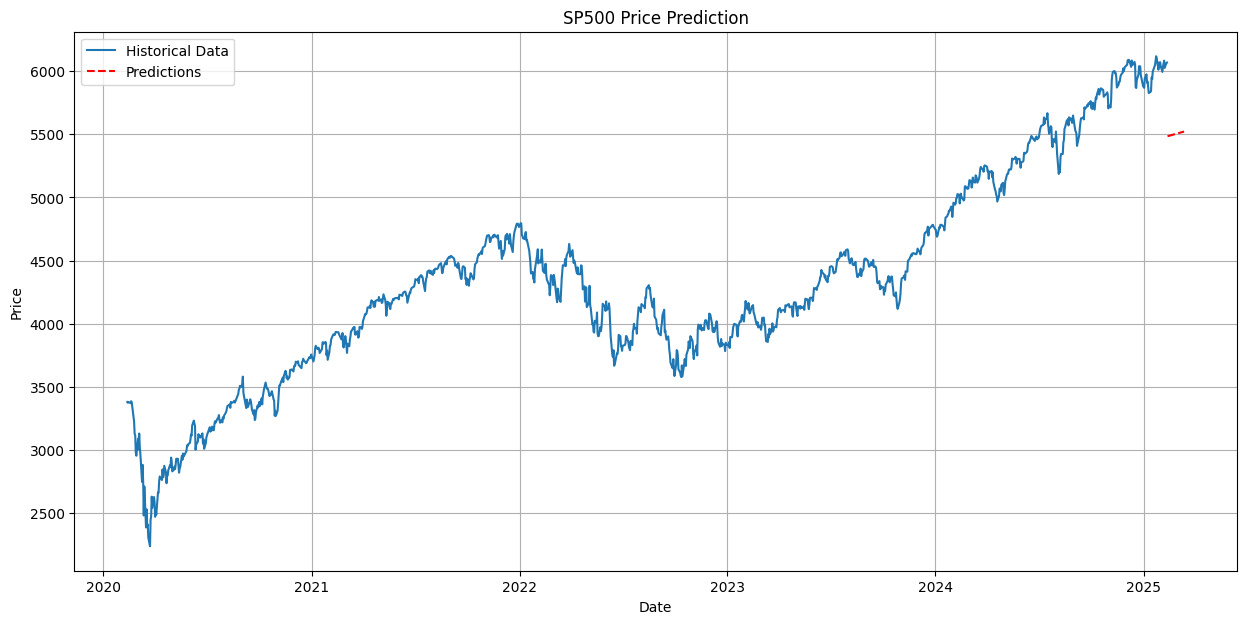


Predicted prices for the next 30 days:
         Date  Predicted_Price
0  2025-02-12      5484.979912
1  2025-02-13      5486.258191
2  2025-02-14      5487.536470
3  2025-02-15      5488.814749
4  2025-02-16      5490.093028
5  2025-02-17      5491.371307
6  2025-02-18      5492.649586
7  2025-02-19      5493.927865
8  2025-02-20      5495.206144
9  2025-02-21      5496.484423
10 2025-02-22      5497.762702
11 2025-02-23      5499.040982
12 2025-02-24      5500.319261
13 2025-02-25      5501.597540
14 2025-02-26      5502.875819
15 2025-02-27      5504.154098
16 2025-02-28      5505.432377
17 2025-03-01      5506.710656
18 2025-03-02      5507.988935
19 2025-03-03      5509.267214
20 2025-03-04      5510.545493
21 2025-03-05      5511.823772
22 2025-03-06      5513.102051
23 2025-03-07      5514.380330
24 2025-03-08      5515.658609
25 2025-03-09      5516.936888
26 2025-03-10      5518.215167
27 2025-03-11      5519.493446
28 2025-03-12      5520.771725
29 2025-03-13      5522.050004

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../CSV/df_sp500.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create features for prediction (using days since start)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Prepare X and y
X = df['Days'].values.reshape(-1, 1)
y = df['Close'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Create future dates for prediction (next 30 days)
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=31)[1:]
future_days = (future_dates - df['Date'].min()).days.values.reshape(-1, 1)

# Make predictions
future_predictions = model.predict(future_days)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, 'r--', label='Predictions')
plt.title('SP500 Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted values
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})
print("\nPredicted prices for the next 30 days:")
print(future_df)


Métriques d'évaluation:
RMSE (train): 385.64
RMSE (test): 796.83
R² (train): 0.4701
R² (test): -4.4320

Prédictions pour les 30 prochains jours:
         Date  Predicted_Price
0  2025-02-12      4958.115299
1  2025-02-13      4958.978307
2  2025-02-14      4959.841315
3  2025-02-15      4960.704322
4  2025-02-16      4961.567330
5  2025-02-17      4962.430337
6  2025-02-18      4963.293345
7  2025-02-19      4964.156352
8  2025-02-20      4965.019360
9  2025-02-21      4965.882367
10 2025-02-22      4966.745375
11 2025-02-23      4967.608383
12 2025-02-24      4968.471390
13 2025-02-25      4969.334398
14 2025-02-26      4970.197405
15 2025-02-27      4971.060413
16 2025-02-28      4971.923420
17 2025-03-01      4972.786428
18 2025-03-02      4973.649436
19 2025-03-03      4974.512443
20 2025-03-04      4975.375451
21 2025-03-05      4976.238458
22 2025-03-06      4977.101466
23 2025-03-07      4977.964473
24 2025-03-08      4978.827481
25 2025-03-09      4979.690489
26 2025-03-10    

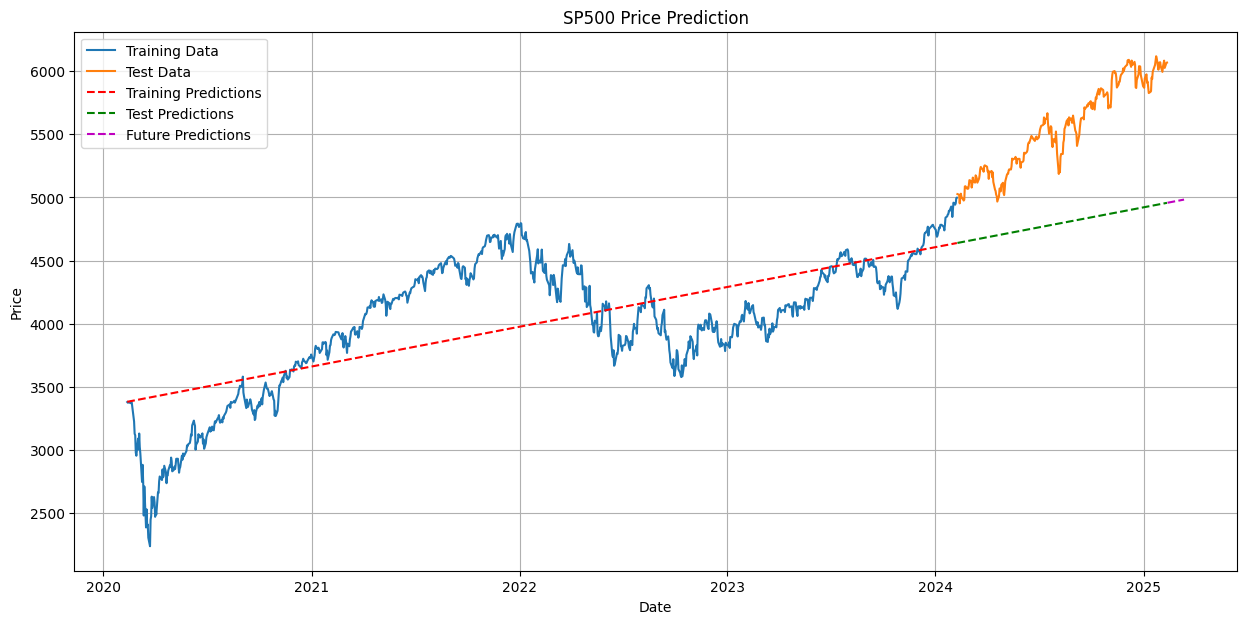

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('../CSV/df_sp500.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Créer une caractéristique temporelle
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Normaliser les données
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
X = df['Days'].values.reshape(-1, 1)
y = price_scaled.ravel()

# Diviser les données (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverser la normalisation
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculer les métriques
train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_predictions))
r2_train = r2_score(y_train_orig, train_predictions)
r2_test = r2_score(y_test_orig, test_predictions)

# Prédictions futures
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=31)[1:]
future_days = (future_dates - df['Date'].min()).days.values.reshape(-1, 1)
future_predictions = model.predict(future_days)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df['Date'][:train_size], y_train_orig, label='Training Data')
plt.plot(df['Date'][train_size:], y_test_orig, label='Test Data')
plt.plot(df['Date'][:train_size], train_predictions, 'r--', label='Training Predictions')
plt.plot(df['Date'][train_size:], test_predictions, 'g--', label='Test Predictions')
plt.plot(future_dates, future_predictions, 'm--', label='Future Predictions')

plt.title('SP500 Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Afficher les métriques
print(f"\nMétriques d'évaluation:")
print(f"RMSE (train): {train_rmse:.2f}")
print(f"RMSE (test): {test_rmse:.2f}")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (test): {r2_test:.4f}")

# Afficher les prédictions futures
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions.ravel()
})
print("\nPrédictions pour les 30 prochains jours:")
print(future_df)

plt.show()


Métriques d'évaluation:
RMSE (train): 93.71
RMSE (test): 549.75
R² (train): 0.2675
R² (test): -5.8477

Prédictions pour les 30 prochains jours:
         Date  Predicted_Price
0  2025-02-13      1988.874191
1  2025-02-14      1989.008342
2  2025-02-15      1989.142493
3  2025-02-16      1989.276644
4  2025-02-17      1989.410796
5  2025-02-18      1989.544947
6  2025-02-19      1989.679098
7  2025-02-20      1989.813249
8  2025-02-21      1989.947400
9  2025-02-22      1990.081551
10 2025-02-23      1990.215703
11 2025-02-24      1990.349854
12 2025-02-25      1990.484005
13 2025-02-26      1990.618156
14 2025-02-27      1990.752307
15 2025-02-28      1990.886458
16 2025-03-01      1991.020609
17 2025-03-02      1991.154761
18 2025-03-03      1991.288912
19 2025-03-04      1991.423063
20 2025-03-05      1991.557214
21 2025-03-06      1991.691365
22 2025-03-07      1991.825516
23 2025-03-08      1991.959668
24 2025-03-09      1992.093819
25 2025-03-10      1992.227970
26 2025-03-11     

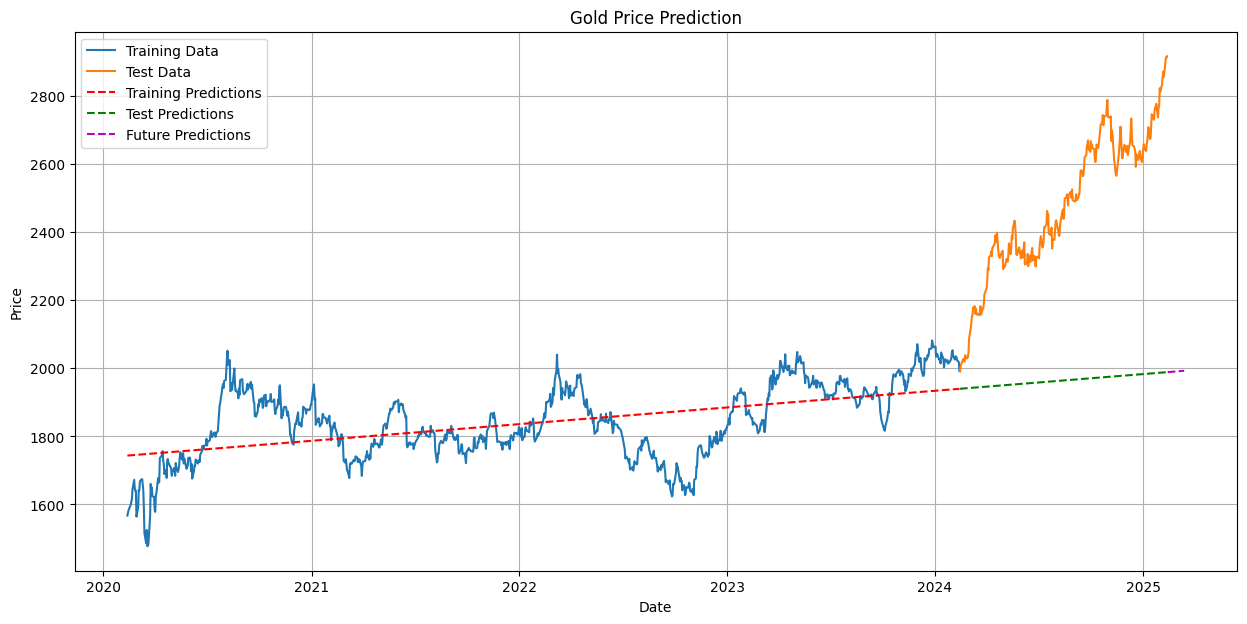

In [9]:
# Charger les données
df = pd.read_csv('../CSV/df_gold.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Créer une caractéristique temporelle
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Normaliser les données
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
X = df['Days'].values.reshape(-1, 1)
y = price_scaled.ravel()

# Diviser les données (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverser la normalisation
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculer les métriques
train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_predictions))
r2_train = r2_score(y_train_orig, train_predictions)
r2_test = r2_score(y_test_orig, test_predictions)

# Prédictions futures
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=31)[1:]
future_days = (future_dates - df['Date'].min()).days.values.reshape(-1, 1)
future_predictions = model.predict(future_days)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df['Date'][:train_size], y_train_orig, label='Training Data')
plt.plot(df['Date'][train_size:], y_test_orig, label='Test Data')
plt.plot(df['Date'][:train_size], train_predictions, 'r--', label='Training Predictions')
plt.plot(df['Date'][train_size:], test_predictions, 'g--', label='Test Predictions')
plt.plot(future_dates, future_predictions, 'm--', label='Future Predictions')

plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Afficher les métriques
print(f"\nMétriques d'évaluation:")
print(f"RMSE (train): {train_rmse:.2f}")
print(f"RMSE (test): {test_rmse:.2f}")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (test): {r2_test:.4f}")

# Afficher les prédictions futures
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions.ravel()
})
print("\nPrédictions pour les 30 prochains jours:")
print(future_df)

plt.show()


Métriques d'évaluation:
RMSE (train): 14479.76
RMSE (test): 38132.01
R² (train): 0.0549
R² (test): -4.9526

Prédictions pour les 30 prochains jours:
         Date  Predicted_Price
0  2025-02-13     38975.338265
1  2025-02-14     38983.607635
2  2025-02-15     38991.877005
3  2025-02-16     39000.146376
4  2025-02-17     39008.415746
5  2025-02-18     39016.685117
6  2025-02-19     39024.954487
7  2025-02-20     39033.223857
8  2025-02-21     39041.493228
9  2025-02-22     39049.762598
10 2025-02-23     39058.031968
11 2025-02-24     39066.301339
12 2025-02-25     39074.570709
13 2025-02-26     39082.840079
14 2025-02-27     39091.109450
15 2025-02-28     39099.378820
16 2025-03-01     39107.648190
17 2025-03-02     39115.917561
18 2025-03-03     39124.186931
19 2025-03-04     39132.456301
20 2025-03-05     39140.725672
21 2025-03-06     39148.995042
22 2025-03-07     39157.264412
23 2025-03-08     39165.533783
24 2025-03-09     39173.803153
25 2025-03-10     39182.072523
26 2025-03-11

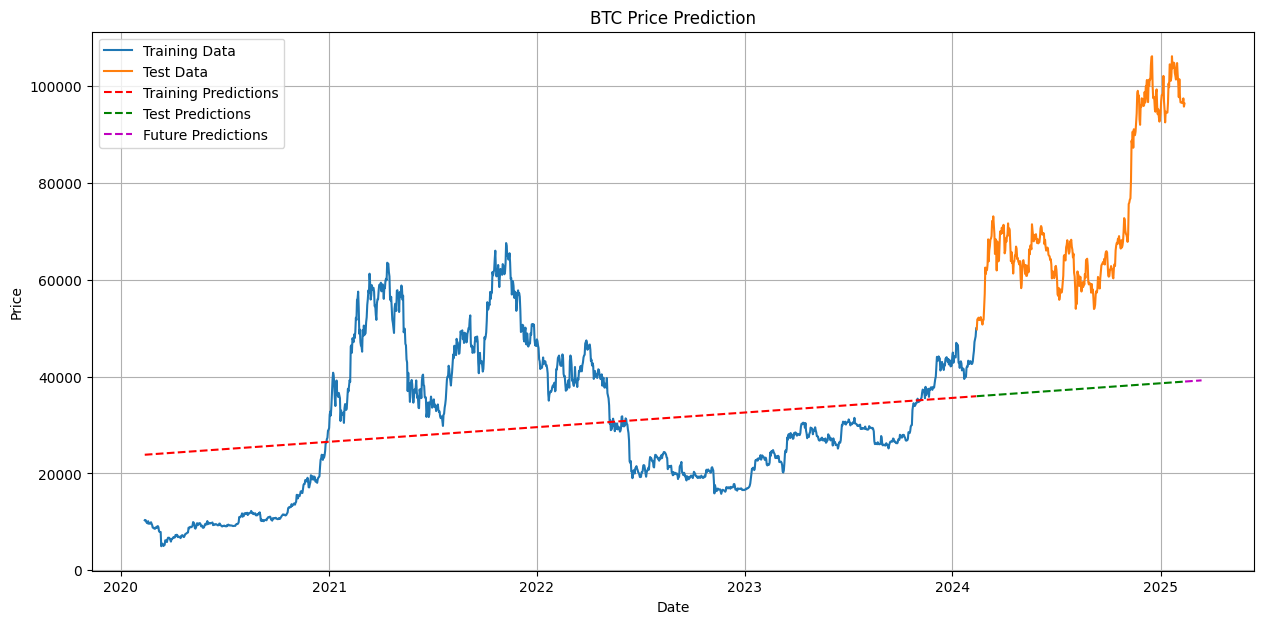

In [11]:
# Charger les données
df = pd.read_csv('../CSV/df_btc.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Créer une caractéristique temporelle
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Normaliser les données
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
X = df['Days'].values.reshape(-1, 1)
y = price_scaled.ravel()

# Diviser les données (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverser la normalisation
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculer les métriques
train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_predictions))
r2_train = r2_score(y_train_orig, train_predictions)
r2_test = r2_score(y_test_orig, test_predictions)

# Prédictions futures
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=31)[1:]
future_days = (future_dates - df['Date'].min()).days.values.reshape(-1, 1)
future_predictions = model.predict(future_days)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df['Date'][:train_size], y_train_orig, label='Training Data')
plt.plot(df['Date'][train_size:], y_test_orig, label='Test Data')
plt.plot(df['Date'][:train_size], train_predictions, 'r--', label='Training Predictions')
plt.plot(df['Date'][train_size:], test_predictions, 'g--', label='Test Predictions')
plt.plot(future_dates, future_predictions, 'm--', label='Future Predictions')

plt.title('BTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Afficher les métriques
print(f"\nMétriques d'évaluation:")
print(f"RMSE (train): {train_rmse:.2f}")
print(f"RMSE (test): {test_rmse:.2f}")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (test): {r2_test:.4f}")

# Afficher les prédictions futures
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions.ravel()
})
print("\nPrédictions pour les 30 prochains jours:")
print(future_df)

plt.show()